# Image to code generation

In [31]:
from google.colab import drive 
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [32]:
# !unzip -u '/content/drive/My Drive/purecode/Assignment_Data.zip' -d '/content/drive/My Drive/purecode/dataset'

In [33]:
# imports
import os
from os import listdir
from numpy import array
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt 

In [34]:
# paths for dataset
output_files= os.getcwd()+"/drive/My Drive/purecode/"
d1_imgs= os.getcwd()+"/drive/My Drive/purecode/dataset/D1/IMAGES/"
d1_labels= os.getcwd()+"/drive/My Drive/purecode/dataset/D1/TEXT_LABELS/"
d2_imgs= os.getcwd()+"/drive/My Drive/purecode/dataset/D2/IMAGES/"
d2_labels= os.getcwd()+"/drive/My Drive/purecode/dataset/D2/TEXT_LABELS/"
d3_imgs= os.getcwd()+"/drive/My Drive/purecode/dataset/D3/IMAGES/"
d3_labels= os.getcwd()+"/drive/My Drive/purecode/dataset/D3/TEXT_LABELS/"
# ds_val_imgs= os.getcwd()+"/drive/My Drive/purecode/dataset/D1/IMAGES/val/"
# ds_val_labels = os.getcwd()+"/drive/My Drive/purecode/dataset/D1/TEXT_LABELS/val/"
vocab_bootstrap= os.getcwd()+"/drive/My Drive/purecode/"



# Data preparation

In [35]:
#read images and converted into numpy array
def load_images(img):  
  im = cv2.imread(img)    
  return im

# read labels
def load_doc(input_label_file):
  file= open(input_label_file,'r')
  text = file.read()  
  # Load the tokens and rap them in a start and end tag
  text = ' ' + text + ' '
  # Seperate all the words with a single space
  text = ' '.join(text.split())
  # Add a space after each comma
  text = text.replace(',', ' ,')
  return text 

In [36]:
# Reading D1 Dataset
dataset_desc = pd.DataFrame()
len_lst=[]
all_images1 =[file for file in os.listdir(d1_imgs) if file.endswith('.png')]
all_images1.sort()
all_labels1=[file for file in os.listdir(d1_labels) if file.endswith('.gui')]
all_labels1.sort()
print("Dataset D1: No.of images {} and No. of labels {}".format(str(len(all_images1)),str(len(all_labels1))))

# Reading D2 Dataset
all_images2 =[file for file in os.listdir(d2_imgs) if file.endswith('.png')]
all_images2.sort()
all_labels2=[file for file in os.listdir(d2_labels) if file.endswith('.gui')]
all_labels2.sort()
print("Dataset D2: No.of images {} and No. of labels {}".format(str(len(all_images2)),str(len(all_labels2))))

# Reading D3 Dataset
all_images3 =[file for file in os.listdir(d3_imgs) if file.endswith('.png')]
all_images3.sort()
all_labels3=[file for file in os.listdir(d3_labels) if file.endswith('.gui')]
all_labels3.sort()
print("Dataset D1: No.of images {} and No. of labels {}".format(str(len(all_images3)),str(len(all_labels3))))

#Data extraction
len_lst= [[all_images1,all_images2,all_images3],[all_labels1,all_labels2,all_labels3]]

lst_path= [[d1_imgs,d2_imgs,d3_imgs],[d1_labels,d2_labels,d3_labels]]

for k in range(len(len_lst)):
  if k==0:
    for i in range(len(len_lst[k])):
      cnt =[]   
      for img in len_lst[k][i]:
        # print(img)
        im = load_images(lst_path[k][i]+img)
        cnt.append(im.shape)
      dataset_desc[f"imgs_D{i+1}"]= len_lst[k][i]
      dataset_desc[f"imgs_shape_D{i+1}"]= cnt
  else:
    for i in range(len(len_lst[k])):
      cnt =[]  
      cnt_t=[] 
      for f in len_lst[k][i]:
        # print(f)
        d = load_doc(lst_path[k][i]+f)
        cnt.append(len(d))
        cnt_t.append(d)
      dataset_desc[f"labels_D{i+1}"]= len_lst[k][i]
      dataset_desc[f"labels_size_D{i+1}"]= cnt
      dataset_desc[f"labels_text_D{i+1}"]= cnt_t

#save datset description into excel file
# dataset_desc.to_excel(output_files+"Dataset_Description.xlsx")

Dataset D1: No.of images 300 and No. of labels 300
Dataset D2: No.of images 300 and No. of labels 300
Dataset D1: No.of images 300 and No. of labels 300


In [48]:
dataset_desc.head()


,imgs_D1,imgs_shape_D1,imgs_D2,imgs_shape_D2,imgs_D3,imgs_shape_D3,labels_D1,labels_size_D1,labels_text_D1,labels_D2,labels_size_D2,labels_text_D2,labels_D3,labels_size_D3,labels_text_D3
0,01357379-D6C2-4B01-AA66-C8790642D0B1.png,"(900, 1850, 3)",10408432.png,"(935, 1848, 3)",1007382.png,"(1080, 1920, 3)",01357379-D6C2-4B01-AA66-C8790642D0B1.gui,377,"header { btn-active , btn-inactive , btn-inact...",10408432.gui,449,"header { page-title , search-bar } sidebar { c...",1007382.gui,307,"components { sidebar , home } orientation { si..."
1,01B6145F-B88B-4FF8-B7D7-BB8A321EDA85.png,"(900, 1850, 3)",10410760.png,"(935, 1848, 3)",1017406.png,"(1080, 1920, 3)",01B6145F-B88B-4FF8-B7D7-BB8A321EDA85.gui,126,"header { btn-inactive , btn-active } row { dou...",10410760.gui,333,"header { page-title , search-bar } sidebar { c...",1017406.gui,347,"components { sidebar , home } orientation { si..."
2,02C4C780-79EA-43F1-B2AE-3A2C757F874C.png,"(900, 1850, 3)",10520680.png,"(935, 1848, 3)",1022926.png,"(1080, 1920, 3)",02C4C780-79EA-43F1-B2AE-3A2C757F874C.gui,398,"header { btn-inactive , btn-active , btn-inact...",10520680.gui,339,"header { page-title , search-bar } sidebar { c...",1022926.gui,311,"components { sidebar , home } orientation { si..."
3,03806667-47A8-4965-8E93-21E205D5E8A7.png,"(900, 1850, 3)",10616008.png,"(935, 1848, 3)",102606.png,"(1080, 1920, 3)",03806667-47A8-4965-8E93-21E205D5E8A7.gui,373,"header { btn-active , btn-inactive , btn-inact...",10616008.gui,446,"header { page-title , search-bar } sidebar { c...",102606.gui,292,"components { sidebar , home } orientation { si..."
4,042B145D-1E0D-47CB-B16C-7F49B64DFF53.png,"(900, 1850, 3)",10810885.png,"(935, 1848, 3)",1030494.png,"(1080, 1920, 3)",042B145D-1E0D-47CB-B16C-7F49B64DFF53.gui,405,"header { btn-inactive , btn-active , btn-inact...",10810885.gui,232,"header { page-title , search-bar } sidebar { c...",1030494.gui,327,"components { sidebar , home } orientation { si..."


In [46]:
# vocablury creation
import glob
char_list = []
unique_tokens=pd.DataFrame()
labels_lst=[d1_labels,d2_labels,d3_labels]

for idx, ele in enumerate(labels_lst):
  print(ele)    
  files_list = glob.glob(ele+"*.gui")
  # files_list
  for file_elem in files_list:
    char_list.append(load_doc(file_elem))
  # char_list
  lst_vcb=[]
  listToStr = ' '.join([str(elem) for elem in char_list])
  vocab= (set(listToStr.split()))
  vocab_len =len(vocab)
  vocab=' '.join(vocab)  
  lst_vcb.append(vocab)
  
  # print(vocab)
  unique_tokens["Unique_tokens_D"+str(idx+1)]=lst_vcb
  unique_tokens["No.of tokens_D"+str(idx+1)]=vocab_len


# save dataset unique tokens
# unique_tokens.to_excel(output_files+"unique_tokens_labels.xlsx")


/content/drive/My Drive/purecode/dataset/D1/TEXT_LABELS/
/content/drive/My Drive/purecode/dataset/D2/TEXT_LABELS/
/content/drive/My Drive/purecode/dataset/D3/TEXT_LABELS/


In [49]:
unique_tokens.head()

,Unique_tokens_D1,No.of tokens_D1,Unique_tokens_D2,No.of tokens_D2,Unique_tokens_D3,No.of tokens_D3
0,"btn-inactive quadruple } row btn-green , { btn...",15,"quadruple radio medium-title row rating , btn-...",28,quadruple logo radio medium-title row rating l...,54


In [58]:
# brief about dataset
from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Dataset", "Image_format","Label_format","No.of samples","Unique_tokens"])
 
# Add rows
myTable.add_row(["D1", ".png", ".gui","300", "15"])
myTable.add_row(["D2", ".png",".gui","300","28"])
myTable.add_row(["D3", ".png",".gui","300","54"])

 
print(myTable)

+---------+--------------+--------------+---------------+---------------+
| Dataset | Image_format | Label_format | No.of samples | Unique_tokens |
+---------+--------------+--------------+---------------+---------------+
|    D1   |     .png     |     .gui     |      300      |       15      |
|    D2   |     .png     |     .gui     |      300      |       28      |
|    D3   |     .png     |     .gui     |      300      |       54      |
+---------+--------------+--------------+---------------+---------------+


#Data Visualization

*********D1_dataset_samples***********
shape and size of the dataset samples:--->  (900, 1850, 3) 377
Label:--->  header { btn-active , btn-inactive , btn-inactive } row { quadruple { small-title , text , btn-green } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-red } } row { double { small-title , text , btn-orange } double { small-title , text , btn-green } } row { single { small-title , text , btn-orange } }


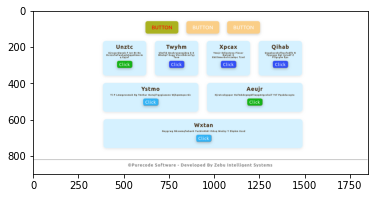

In [41]:
#dataset D1
D1_img=load_images(d1_imgs+all_images1[0])
D1_label=load_doc(d1_labels+all_labels1[0])
print("*********D1_dataset_samples***********")
print("shape and size of the dataset samples:---> ",D1_img.shape, len(D1_label))
print("Label:---> ",D1_label)
plt.imshow(D1_img)

*********D2_dataset_samples***********
shape and size of the dataset samples:--->  (935, 1848, 3) 333
Label:--->  header { page-title , search-bar } sidebar { ck-box , radio , dropdn , rating } canvas-header { btn-active , btn-inactive , btn-inactive , btn-inactive } row { quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-red } }


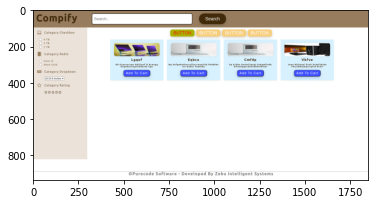

In [42]:
#dataset D2
D2_img=load_images(d2_imgs+all_images2[1])
D2_label=load_doc(d2_labels+all_labels2[1])
print("*********D2_dataset_samples***********")
print("shape and size of the dataset samples:---> ",D2_img.shape, len(D2_label))
print("Label:---> ",D2_label)
plt.imshow(D2_img)

*********D3_dataset_samples***********
shape and size of the dataset samples:--->  (1080, 1920, 3) 311
Label:--->  components { sidebar , home } orientation { sidebar-left-home-right } sidebar { user { user-name } logo { logo-img } nav { field-inactive , field-inactive , field-active } } home { table { btns { btn , btn } table-col { category , category } table-row { entry , entry } } cards { img-btn-card , img-btn-card } }


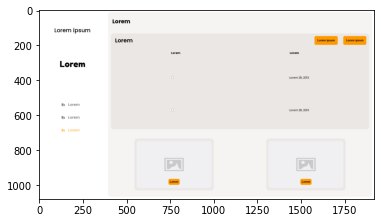

In [43]:
#dataset D3
D3_img=load_images(d3_imgs+all_images3[2])
D3_label=load_doc(d3_labels+all_labels3[2])
print("*********D3_dataset_samples***********")
print("shape and size of the dataset samples:---> ",D3_img.shape, len(D3_label))
print("Label:---> ",D3_label)
plt.imshow(D3_img)

In [44]:
# !pip install session_info

In [45]:
# generate requrements 
import session_info
session_info.show()